# Plotting for Exploratory data analysis (EDA) 

### Habermans Dataset: https://www.kaggle.com/gilsousa/habermans-survival-data-set/version/1
 The dataset contains cases from a study that was conducted between 1958 and 1970 at the University of Chicago's Billings Hospital on the survival of patients who had undergone surgery for breast cancer.

## Dataset : 
***•This Data set contains the 4 Attributes including class attribute*** 
                
        ->Age -  Age of patient at time of operation
 
        ->Year - Patient's year of operatio
 
       ->Nodes - Number of positive axillary nodes detected

***• Class Attribute is Survival Status  which has value 1 & 2*** 
               
           ->1 = the patient survived 5 years or longer
               
           ->2 = the patient died within 5 year
      
***• Objective : 
       Our Objective  is to find the patients survival status after the surgery  depends on the age,year,notes***

   

In [8]:
pip install seaborn 

Note: you may need to restart the kernel to use updated packages.


In [10]:
#import libaries 

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

print("Packages are imported")

Packages are imported


In [16]:
#Load haberman.csv into a pandas dataFrame

hbm = pd.read_csv("D:\Appliedai\haberman.csv")
print("Data loaded into pandas ")

Data loaded into pandas 


In [18]:
# To know about the data-points 
print("Total Number of rows and columns in the dataset",hbm.shape)

Total Number of rows and columns in the dataset (306, 4)


In [20]:
# Name of the columns in the Dataset 
print("Name of the columns are : ", hbm.columns)

Name of the columns are :  Index(['age', 'year', 'nodes', 'status'], dtype='object')


In [120]:
hbm["status"].value_counts()

1    225
2     81
Name: status, dtype: int64

###  Bi-variate analysis


### Scatter Plot

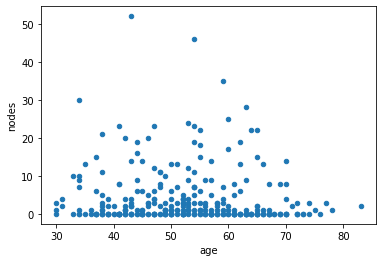

In [26]:
# Scatter plot
hbm.plot(kind='scatter', x='age', y='nodes')
plt.show()

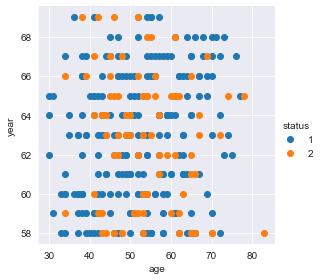

In [28]:
# 2-D Scatter plot with color-coding
sns.set_style("darkgrid");
sns.FacetGrid(hbm, hue="status", size=4) \
   .map(plt.scatter, "age", "year") \
   .add_legend();
plt.show();

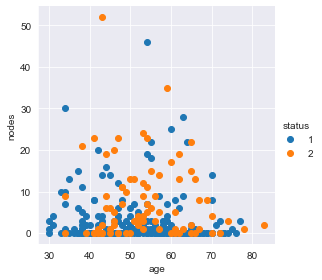

In [33]:
# 2-D Scatter plot with color-coding
sns.set_style("darkgrid");
sns.FacetGrid(hbm, hue="status", size=4) \
   .map(plt.scatter, "age", "nodes") \
   .add_legend();
plt.show();

**Observation(s):**
1. Using age and year, we cannot classify the survival status.
2. Most of the Positive nodes are in the range 0 to 10 and Only few survived after the surgery 
3. We cannot predict from this 2 D scatter plots

### Pair -Plot

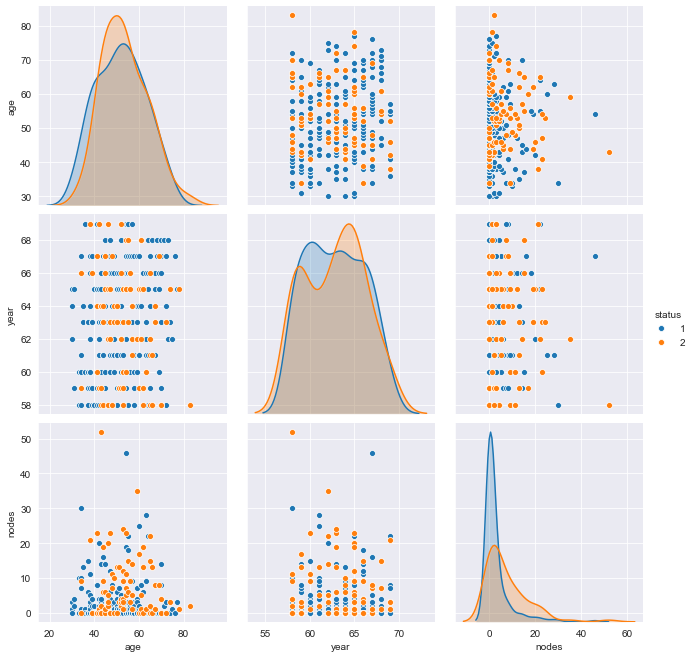

In [49]:
# 3-D Scatter plot with color-coding 
# Pair -Plot
plt.close();
sns.set_style("darkgrid");
sns.pairplot(hbm, hue="status", height=3);
plt.show()


**Observation(s):**
Above plots are not linearly separable and we cannot classify depends on any feature of these features 

## Univarite analysis

###  Histogram 

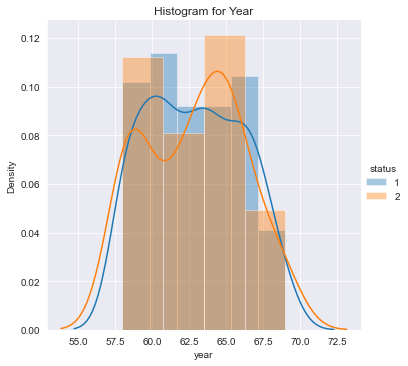

In [123]:
sns.FacetGrid(hbm,hue="status",height=5)\
    .map(sns.distplot,"year")\
    .add_legend()
plt.title("Histogram for Year")
plt.ylabel("Density")
plt.show()


**Observation(s):**
1. Survival rate increased in the year range 60-66 
2. Most unsuccessfull year for the surgery in the range 63-66  

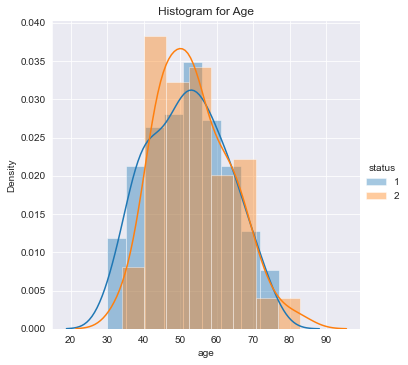

In [122]:
sns.FacetGrid(hbm,hue="status",height=5)\
    .map(sns.distplot,"age")\
    .add_legend()
plt.title("Histogram for Age")
plt.ylabel("Density")
plt.show()


**Observation(s):**
1. Patients age between 40-60 has highest survival rate 
2. Most of the patients died in the range 40-45

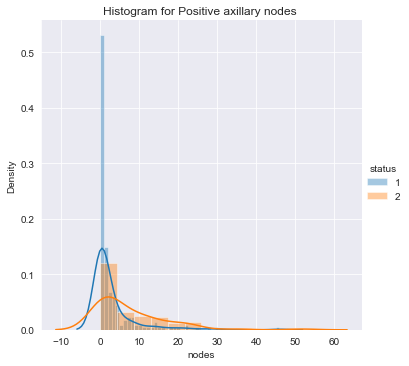

In [124]:
sns.FacetGrid(hbm,hue="status",height=5)\
    .map(sns.distplot,"nodes")\
    .add_legend()
plt.title("Histogram for Positive axillary nodes ")
plt.ylabel("Density")
plt.show()


**Observation(s):**
1. The Positive node 0 has the highest survival rate
2. positive node is good to use for classify the surival rate compare to age and year 

### PDF, CDF

[0.83555556 0.08       0.02222222 0.02666667 0.01777778 0.00444444
 0.00888889 0.         0.         0.00444444]
[ 0.   4.6  9.2 13.8 18.4 23.  27.6 32.2 36.8 41.4 46. ]


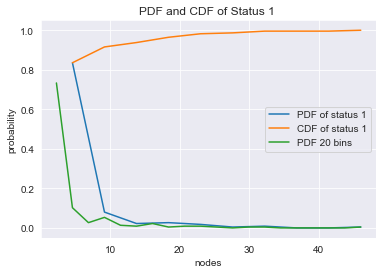

In [125]:
## PDF and CDF for Status 1 = the patient survived 5 years or longer 2
survival_status1=hbm.loc[hbm["status"]==1]
survival_status2=hbm.loc[hbm["status"]==2]
counts, bin_edges = np.histogram(survival_status1['nodes'], bins=10, 
                                 density = True)
pdf1 = counts/(sum(counts))
print(pdf1);
print(bin_edges);

cdf1 = np.cumsum(pdf)
plt.plot(bin_edges[1:],pdf1,label ="PDF of status 1");
plt.plot(bin_edges[1:], cdf1,label ="CDF of status 1");
plt.legend()
plt.xlabel("nodes")
plt.ylabel("probability")
counts, bin_edges = np.histogram(survival_status1['nodes'], bins=20, 
                                 density = True)
pdf1 = counts/(sum(counts))
plt.plot(bin_edges[1:],pdf1, label="PDF 20 bins");
plt.legend()
plt.title("PDF and CDF of Status 1 ")
plt.show();

**Observation(s):**
1. People survied the most when Positive nodes below 10 about 80 %
2. when postive nodes increasing the rate of survival rate is getting decreasing  

[0.56790123 0.14814815 0.13580247 0.04938272 0.07407407 0.
 0.01234568 0.         0.         0.01234568]
[ 0.   5.2 10.4 15.6 20.8 26.  31.2 36.4 41.6 46.8 52. ]


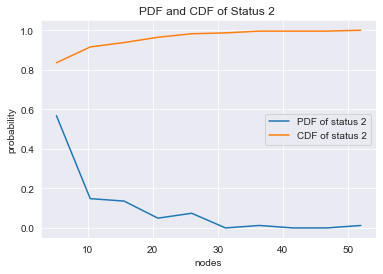

In [126]:
## PDF and CDF for Status 2 = the patient died within 5 year
survival_status2=hbm.loc[hbm["status"]==2]
counts, bin_edges = np.histogram(survival_status2['nodes'], bins=10, 
                                 density = True)
pdf2 = counts/(sum(counts))
print(pdf2);
print(bin_edges);

cdf2 = np.cumsum(pdf)
plt.plot(bin_edges[1:],pdf2,label ="PDF of status 2");
plt.plot(bin_edges[1:], cdf2,label ="CDF of status 2");
plt.legend()
plt.xlabel("nodes")
plt.ylabel("probability")
plt.title("PDF and CDF of Status 2 ")

plt.show();

**Observation:**
80 % people dead when positive node is 10 and increased when postive node is increased

[0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]
[0.5 0.6 0.7 0.8 0.9 1.  1.1 1.2 1.3 1.4 1.5]
[0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]
[1.5 1.6 1.7 1.8 1.9 2.  2.1 2.2 2.3 2.4 2.5]


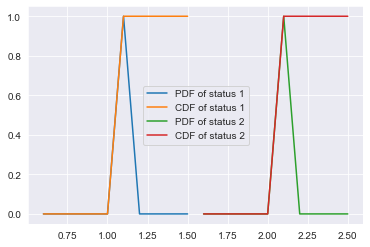

In [133]:
counts, bin_edges = np.histogram(survival_status1['status'], bins=10, 
                                 density = True)
pdf1 = counts/(sum(counts))
print(pdf1);
print(bin_edges)
cdf1 = np.cumsum(pdf1)
plt.plot(bin_edges[1:],pdf1 ,label ="PDF of status 1" )
plt.plot(bin_edges[1:], cdf1,label ="CDF of status 1")
plt.legend()


counts, bin_edges = np.histogram(survival_status2['status'], bins=10, 
                                 density = True)
pdf2 = counts/(sum(counts))
print(pdf2);
print(bin_edges)
cdf2 = np.cumsum(pdf2)
plt.plot(bin_edges[1:],pdf2,label ="PDF of status 2")
plt.plot(bin_edges[1:], cdf2,label ="CDF of status 2")
plt.legend()

## Mean, Variance and Std-dev

In [134]:
print("Means:")
print(np.mean(survival_status1["status"]))
#Mean with an outlier.
print(np.mean(np.append(survival_status1["status"],50)));
print(np.mean(survival_status1["status"]))
print(np.mean(survival_status2["status"]))

print("\nStd-dev:");
print(np.std(survival_status1["status"]))
print(np.std(survival_status2["status"]))


Means:
1.0
1.2168141592920354
1.0
2.0

Std-dev:
0.0
0.0


## Median, Percentile, Quantile, IQR, MAD

In [136]:
pip install statsmodels

Note: you may need to restart the kernel to use updated packages.


In [137]:
print("\nMedians:")
print(np.median(survival_status1["status"]))
#Median with an outlier
print(np.median(np.append(survival_status1["status"],50)));
print(np.median(survival_status1["status"]))
print(np.median(survival_status2["status"]))


print("\nQuantiles:")
print(np.percentile(survival_status1["status"],np.arange(0, 100, 25)))
print(np.percentile(survival_status2["status"],np.arange(0, 100, 25)))


print("\n90th Percentiles:")
print(np.percentile(survival_status1["status"],90))
print(np.percentile(survival_status2["status"],90))

from statsmodels import robust
print ("\nMedian Absolute Deviation")
print(robust.mad(survival_status1["status"]))
print(robust.mad(survival_status1["status"]))



Medians:
1.0
1.0
1.0
2.0

Quantiles:
[1. 1. 1. 1.]
[2. 2. 2. 2.]

90th Percentiles:
1.0
2.0

Median Absolute Deviation
0.0
0.0


## Box plot and Whiskers

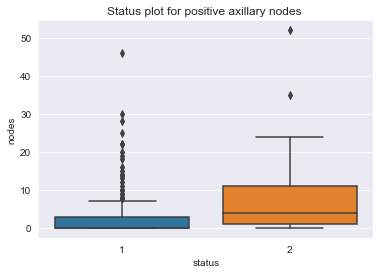

In [127]:
sns.boxplot(x='status',y='nodes', data=hbm)
plt.title("Status plot for positive axillary nodes ")
plt.show()

## Violin plots

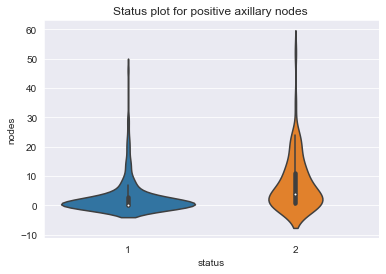

In [128]:
sns.violinplot(x="status", y="nodes", data=hbm, size=8)
plt.title("Status plot for positive axillary nodes ")
plt.show()

**Observation(s):**
1. Patients survived when the positive node in the range 0-10 
2. Survival rate reduced when positive node increased 

## Multivariate probability density, contour plot

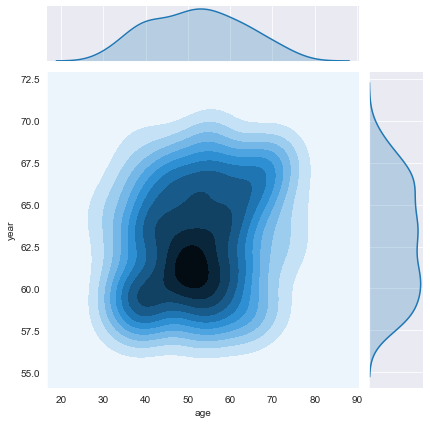

In [130]:
sns.jointplot(x="age", y="year", data=survival_status1, kind="kde");
plt.show();

**Observation(s):**
1. Patinets age range between 40-60 undergone for surgery at the most
2. Most of the patients operated in the year 58 to 67

In [116]:
survival_status1_SW = survival_status1.iloc[:,1]
survival_status2_SW = survival_status2.iloc[:,1]

In [117]:
from scipy import stats
stats.ks_2samp(survival_status1_SW, survival_status2_SW)

Ks_2sampResult(statistic=0.0725925925925926, pvalue=0.885895386162465)

In [118]:
x = stats.norm.rvs(loc=0.2, size=100)
stats.kstest(x,'norm')

KstestResult(statistic=0.06791897262666657, pvalue=0.7606116567236818)

## Conclusion:
   
   • Classification of Survival status is difficult depends on Age and Year since it is not Linearly separable and has more overlapping points
   
   • Using Positive axillary nodes we can classify that patients are survived whose positive node is in the range 0 to 10 
   
   • When positive node is increased above 10 survival rate reduced 